In [1]:
cd "C:\Users\Shreya\Desktop\Final Year Project"

C:\Users\Shreya\Desktop\Final Year Project


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mne

In [4]:
from mne.datasets import testing
from mne.io import read_raw_edf
from mne.utils import run_tests_if_main
from mne import pick_types, find_events

In [5]:
raw=mne.io.read_raw_gdf(r'C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf',stim_channel='None')

Extracting EDF parameters from C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...


c:\users\shreya\envs\pes_ai_pip\lib\site-packages\mne\io\edf\edf.py:996: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-5-e7fb9292bf96>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_gdf(r'C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf',stim_channel='None')


In [6]:
raw=mne.io.read_raw_gdf(r'C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf',preload=True)

Extracting EDF parameters from C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf...
GDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\users\shreya\envs\pes_ai_pip\lib\site-packages\mne\io\edf\edf.py:996: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
<ipython-input-6-3826d105569f>:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  raw=mne.io.read_raw_gdf(r'C:\Users\Shreya\Desktop\Final Year Project\BCICIV_2a_gdf\A01T.gdf',preload=True)


In [7]:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

print(raw.info)


bad channels: []
250.0 Hz
None 

<Info | 7 non-empty values
 bads: []
 ch_names: EEG-Fz, EEG-0, EEG-1, EEG-2, EEG-3, EEG-4, EEG-5, EEG-C3, EEG-6, ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 2005-01-17 12:00:00 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>


In [9]:
raw.rename_channels({'EEG-Fz':'Fz', 'EEG-0':'FC3', 'EEG-1':'FC1', 'EEG-2':'FCz', 'EEG-3':'FC2', 'EEG-4':'FC4', 'EEG-5':'C5', 'EEG-C3':'C3', 'EEG-6':'C1', 'EEG-Cz':'Cz', 'EEG-7':'C2', 'EEG-C4':'C4', 'EEG-8':'C6', 'EEG-9':'CP3', 'EEG-10':'CP1', 'EEG-11':'CPz', 'EEG-12':'CP2', 'EEG-13':'CP4', 'EEG-14':'P1', 'EEG-Pz':'Pz', 'EEG-15':'P2', 'EEG-16':'POz', 'EOG-left':'M1', 'EOG-central':'FPz', 'EOG-right':'M2'})

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [10]:
eeg_and_eog = raw.copy().pick_types(meg=False, eeg=True, eog=True)
print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))
raw_temp = raw.copy()
print('Number of channels in raw_temp:')
print(len(raw_temp.ch_names), end=' → drop one → ')
raw_temp.drop_channels(['Fz'])
print(len(raw_temp.ch_names), end=' → pick two → ')
raw_temp.pick_channels(['C3', 'M1'])
print(len(raw_temp.ch_names))
#used to get channels to get in a particular order.
channel_names = ['C3', 'M1', 'Fz', 'C4']
eog_and_frontal_eeg = raw.copy().reorder_channels(channel_names)
print(eog_and_frontal_eeg.ch_names)

25 → 25
Number of channels in raw_temp:
25 → drop one → 24 → pick two → 2
['C3', 'M1', 'Fz', 'C4']


In [11]:
#get the signals in particular time
raw_selection = raw.copy().crop(tmin=10, tmax=12.5)
print(raw_selection)

<RawGDF | A01T.gdf, 25 x 626 (2.5 s), ~175 kB, data loaded>


In [12]:
#same as above.Using sampling frquency to extract signals.
#give the start and end timings,given in line 2 (3750/15 = 250(sampling frequency)).
#Can choose any channels using channel_index
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([0, 15])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(len(raw_selection[0][0]))
print(raw_selection[0][0])

3750
[-2.11425781e-05 -2.19238281e-05 -1.56250000e-05 ... -1.77734375e-05
 -1.69921875e-05 -2.08984375e-05]


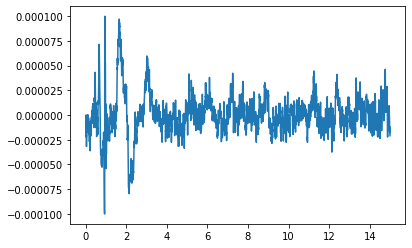

In [13]:
#plot any section of signal
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)


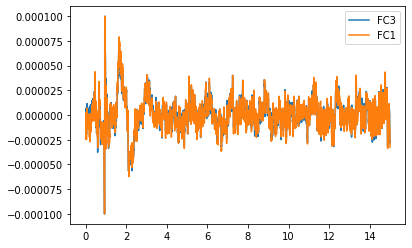

In [92]:
#plot any number of signals in a single graph
channel_names = ['FC3', 'FC1']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

In [7]:
names=[]
for i,j in enumerate(raw._raw_extras[0]):
    names.append(j)
print(names)   

['type', 'subtype', 'number', 'bytes_tot', 'ch_names', 'data_offset', 'dtype_byte', 'dtype_np', 'digital_max', 'exclude', 'gnd', 'highpass', 'sel', 'impedance', 'lowpass', 'meas_date', 'meas_id', 'n_records', 'n_samps', 'nchan', 'notch', 'subject_info', 'physical_max', 'record_length', 'ref', 'units', 'event_sfreq', 'events', 'stim_channel_idxs', 'max_samp', 'nsamples', 'cal', 'offsets', 'orig_nchan']


In [85]:
(raw._raw_extras[0]['ch_names'])

['EEG-Fz',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG-C3',
 'EEG',
 'EEG-Cz',
 'EEG',
 'EEG-C4',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG',
 'EEG-Pz',
 'EEG',
 'EEG',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [148]:
#events 1:position  2:name of the task  3:some 0s   4:some mapping
#276:29682  277:20271 768:1875 769:313 770:313 771:313 772:313 1023:1875 1072:41562 32766:1  
#print(len((raw._raw_extras[0]['events'][2][0])))

for i in range(603):
    #print((raw._raw_extras[0]['events'][1][i]),raw._raw_extras[0]['events'][2][i])
    print((raw._raw_extras[0]['events'][1][i]),':',(raw._raw_extras[0]['events'][4][i]))


0 : 1
0 : 29682
29683 : 1
29683 : 20271
49955 : 1
49955 : 41562
91518 : 1
91868 : 1875
92368 : 313
93871 : 1875
94371 : 313
95789 : 1875
96289 : 313
97741 : 1875
98241 : 313
99749 : 1875
100249 : 313
101860 : 1875
102360 : 313
103777 : 1875
104277 : 313
105827 : 1875
106327 : 313
107758 : 1875
108258 : 313
109756 : 1875
110256 : 313
111662 : 1875
112162 : 313
113557 : 1875
114057 : 313
115529 : 1875
116029 : 313
117473 : 1875
117973 : 313
119440 : 1875
119940 : 313
121560 : 1875
122060 : 313
123568 : 1875
124068 : 313
125634 : 1875
126134 : 313
127670 : 1875
128170 : 313
129736 : 1875
130236 : 313
131806 : 1875
132306 : 313
133886 : 1875
133886 : 1875
134386 : 313
135798 : 1875
136298 : 313
137829 : 1875
138329 : 313
139782 : 1875
140282 : 313
141743 : 1875
142243 : 313
143847 : 1875
144347 : 313
145851 : 1875
146351 : 313
147826 : 1875
148326 : 313
149852 : 1875
150352 : 313
151923 : 1875
152423 : 313
154030 : 1875
154530 : 313
156122 : 1875
156622 : 313
158213 : 1875
158713 : 313
160

In [14]:
start, stop = raw.time_as_index([100, 115])
data, times = raw[:400, start:stop]
print(data.shape)
print(times.shape)
print(times.min(), times.max())

(25, 3750)
(3750,)
100.0 114.996


In [15]:
xRaw=raw.get_data()

In [16]:
xRaw.shape

(25, 672528)

Effective window size : 8.192 (s)


<ipython-input-17-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


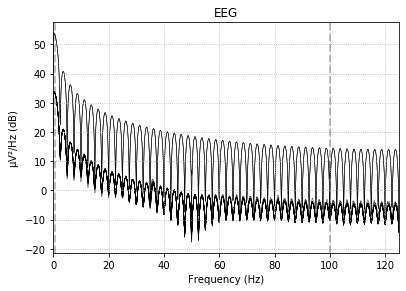

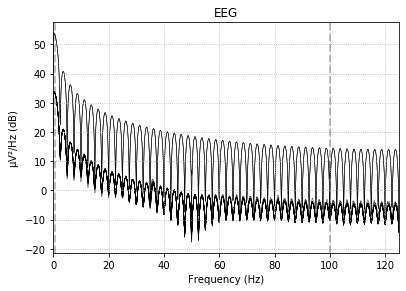

In [17]:
raw.plot_psd()

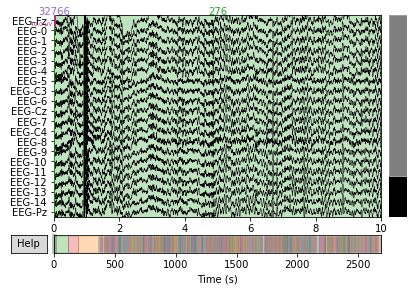

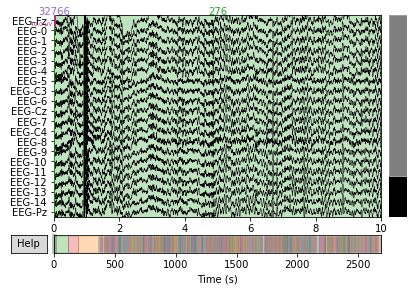

In [14]:
raw.plot()

In [18]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed']

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


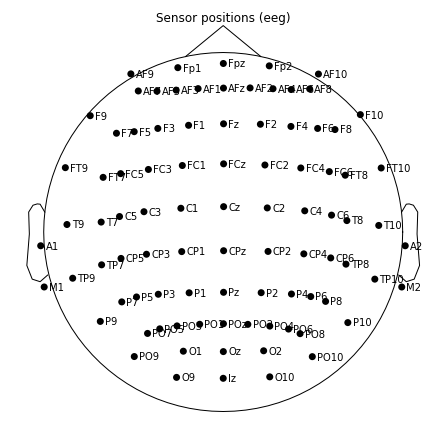

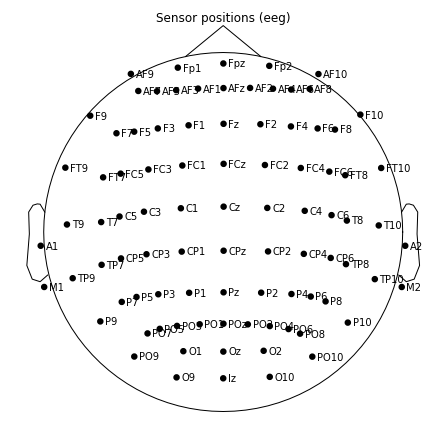

In [20]:
montage=mne.channels.make_standard_montage("standard_1020")
montage.plot()

In [21]:
raw.set_montage(montage,match_case=False)

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [22]:
raw.set_eeg_reference("average")

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [19]:
print(raw.time_as_index(3))

[750]


In [23]:
raw_df=raw.to_data_frame()
raw_df

,time,Fz,FC3,FC1,FCz,FC2,FC4,C5,C3,C1,...,CPz,CP2,CP4,P1,Pz,P2,POz,M1,FPz,M2
0,0,1.591797,-0.947266,1.250000,-2.412109,-2.998047,-5.195313,8.183594,0.224609,-2.705078,...,-7.880859,-6.904297,-3.925781,1.787109,-2.705078,-2.167969,3.056641,54.472656,9.062500,-21.210938
1,4,1.662109,-0.339844,-0.730469,-1.755859,-2.488281,-1.658203,7.521484,0.832031,-4.734375,...,-7.468750,-7.126953,-2.537109,0.587891,-3.513672,-2.781250,0.246094,46.046875,10.402344,-16.941406
2,8,4.212891,0.111328,0.990234,-1.744141,-0.914062,-1.890625,7.386719,-0.572266,-3.892578,...,-8.921875,-8.580078,-4.625000,-1.548828,-5.259766,-4.429687,-1.646484,53.529297,11.537109,-18.736328
3,12,2.677734,5.656250,-0.984375,-1.472656,-4.792969,-2.644531,8.390625,3.019531,-6.208984,...,-8.406250,-9.480469,-6.160156,0.041016,-4.939453,-5.134766,1.457031,61.369141,12.052734,-19.197266
4,16,3.882813,5.591797,2.808594,-3.246094,-4.173828,-6.664062,13.941406,4.859375,-1.390625,...,-8.666016,-10.521484,-9.447266,4.664063,-3.392578,-5.248047,4.810547,60.328125,8.082031,-26.585937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672523,2690092,-6.931641,4.884766,3.517578,1.027344,-4.294922,-5.320312,3.175781,5.568359,4.689453,...,5.177734,2.589844,0.148438,5.812500,4.201172,2.541016,5.177734,0.880859,-47.947266,6.251953
672524,2690096,-4.470703,3.097656,4.464844,1.046875,-2.957031,-4.763672,3.585938,3.390625,5.441406,...,5.099609,2.414063,0.802734,4.611328,4.806641,2.707031,4.123047,-3.201172,-46.169922,8.517578
672525,2690100,-3.384766,1.595703,6.039063,3.353516,0.326172,-3.189453,4.085938,3.060547,7.308594,...,5.257813,2.376953,-0.943359,1.986328,2.962891,1.791016,0.521484,-2.554687,-46.011719,7.699219
672526,2690104,-1.869141,-0.257813,5.894531,5.113281,4.087891,0.621094,1.939453,1.011719,6.968750,...,4.136719,4.087891,1.597656,0.181641,1.792969,1.353516,-2.601563,-7.728516,-51.185547,9.361328


# Mathlab file import

In [129]:
from scipy.io import loadmat
annots = loadmat(r'C:\Users\Shreya\Downloads\A01T.mat')

In [130]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [81]:
print(annots)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Aug  7 13:07:03 2014', '__version__': '1.0', '__globals__': [], 'data': array([[array([[(array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]]), array([], shape=(0, 1), dtype=uint8), array([], shape=(0, 1), dtype=uint8), array([[250]], dtype=uint8), array([[array(['left hand'], dtype='<U9'),
        array(['right hand'], dtype='<U1

In [131]:
def load_file(file):
    loaded_runs = []
    data = loadmat(file, squeeze_me=True)['data']
    for run in data:
        print("----------------------",run)
        x = run['X'].item()
        y = run['y'].item()
        events = run['trial'].item()
        artifacts = run['artifacts'].item()
        misc = {'fs': run['fs'], 'gender': run['gender'], 'age': run['age']}
        loaded_runs.append([x, y, events, artifacts, misc])
    
    return loaded_runs

In [132]:
u=load_file(r'C:\Users\Shreya\Downloads\A01T.mat')

---------------------- (array([[-21.14257812, -23.68164062, -21.484375  , ...,  31.73828125,
        -13.671875  , -43.9453125 ],
       [-21.92382812, -23.92578125, -24.31640625, ...,  22.4609375 ,
        -13.18359375, -40.52734375],
       [-15.625     , -19.7265625 , -18.84765625, ...,  33.69140625,
         -8.30078125, -38.57421875],
       ...,
       [-26.41601562, -17.52929688, -17.28515625, ..., -14.6484375 ,
        -40.52734375, -19.53125   ],
       [-31.98242188, -16.65039062, -21.72851562, ..., -11.71875   ,
        -48.33984375, -12.6953125 ],
       [-33.984375  , -22.4609375 , -23.92578125, ...,  -7.8125    ,
        -42.96875   ,  -9.27734375]]), array([], dtype=float64), array([], dtype=float64), 250, array(['left hand', 'right hand', 'feet', 'tongue'], dtype=object), array([], dtype=float64), 'female', 22)
---------------------- (array([[  2.05078125,   2.83203125,  -0.92773438, ...,  -6.8359375 ,
         15.625     ,  -8.7890625 ],
       [ -2.63671875,  -1.85546

In [151]:
print(len(u))
sum=0
for i in range(len(u)):
    print(len(u[i]))
    print(len(u[i][0]))
    sum=sum+len(u[i][0])
    '''print('------------------------------------------')
    for j in range(5):
        print("****************************************")
        print((u[i][j]))'''
print(sum)

9
5
29683
5
20172
5
41463
5
96735
5
96735
5
96735
5
96735
5
96735
5
96735
671728


In [105]:
print(len(u[4][0]))

96735


# Pre-processing

In [24]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [101]:
ica?

In [25]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 sec)

Fitting ICA to data using 25 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 97.6s.


<ICA | raw data decomposition, fit (fastica): 672528 samples, 20 components, channels used: "eeg">

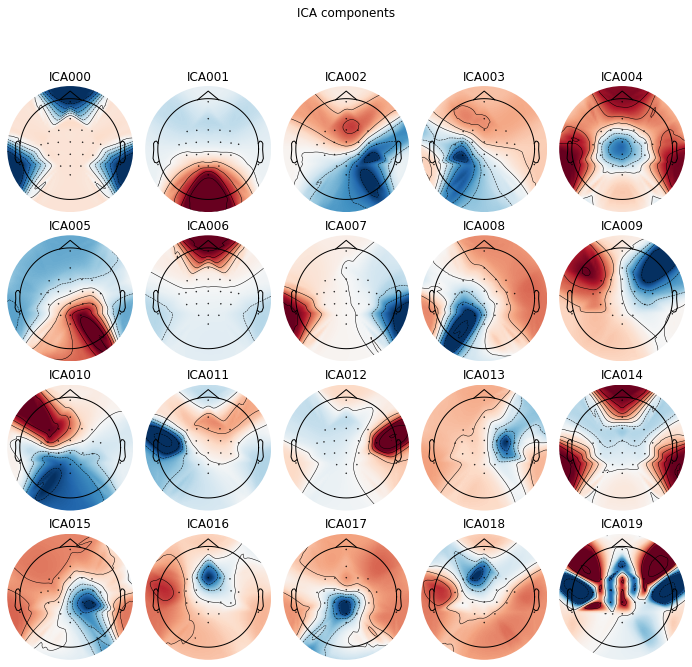

In [26]:
ica.plot_components(outlines="skirt");

In [27]:
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

In [28]:
ica = mne.preprocessing.ICA(method="infomax",
                            fit_params={"extended": True},
                            random_state=1)

In [29]:
ica.fit(raw_tmp)

Fitting ICA to data using 25 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting all PCA components: 25 components
Computing Extended Infomax ICA
Fitting ICA took 825.8s.


<ICA | raw data decomposition, fit (infomax): 672528 samples, 25 components, channels used: "eeg">

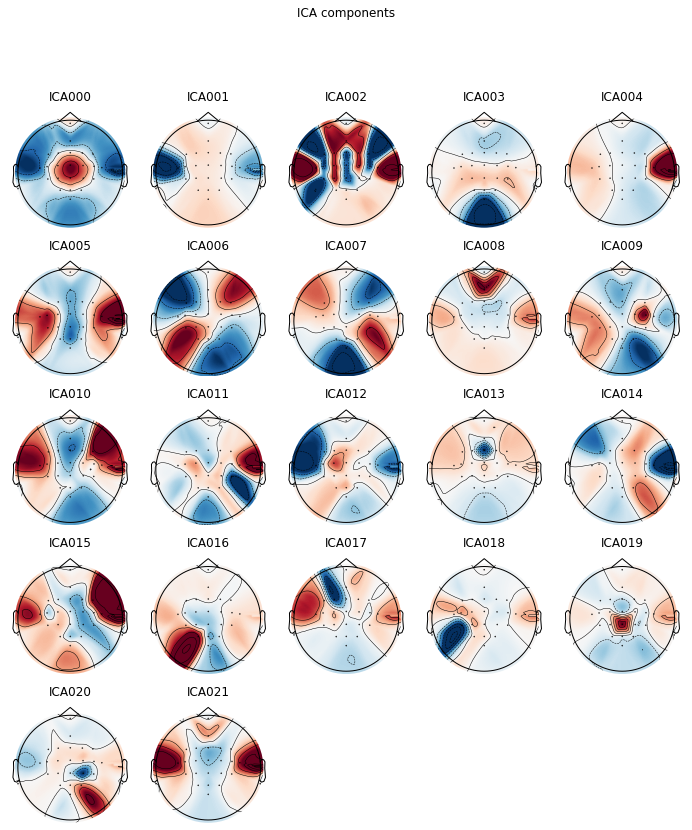

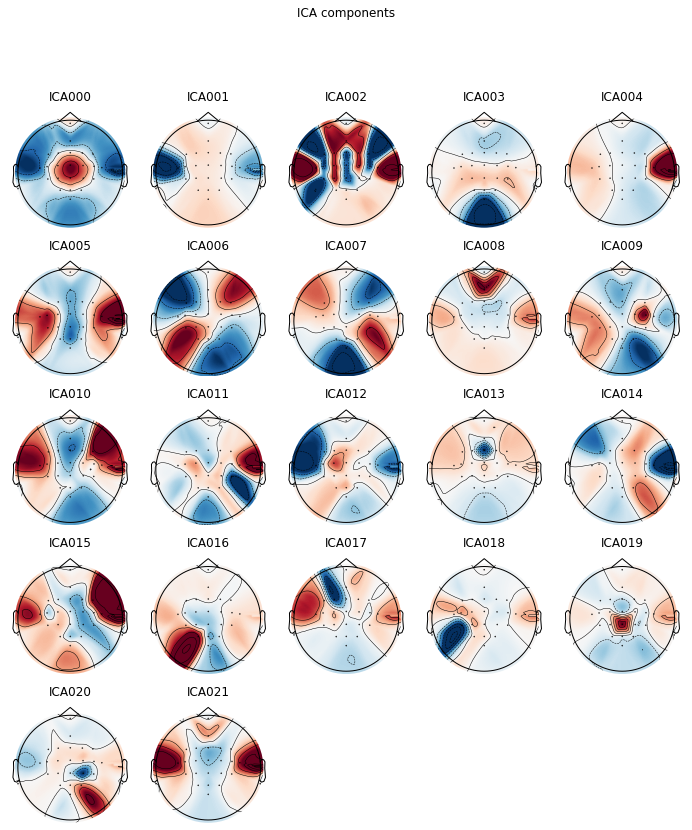

In [30]:
ica.plot_components(inst=raw_tmp, picks=range(22))

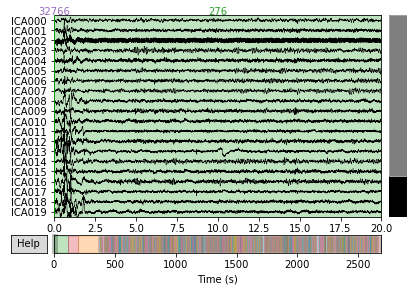

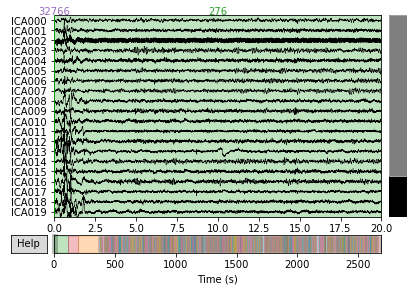

In [31]:
ica.plot_sources(inst=raw_tmp)

In [35]:
ica.exclude = [1]

In [36]:
raw_corrected = raw.copy()
ica.apply(raw_corrected)

Transforming to ICA space (25 components)
Zeroing out 1 ICA component


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MB, data loaded>

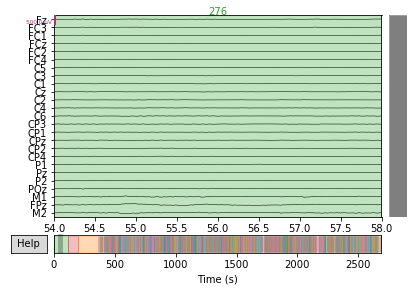

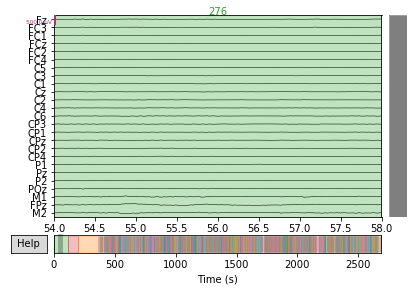

In [37]:
raw.plot(n_channels=25, start=54, duration=4,
         scalings=dict(eeg=250e-6, eog=750e-6))

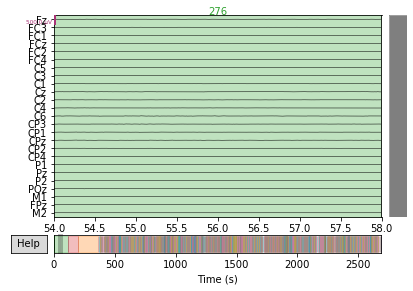

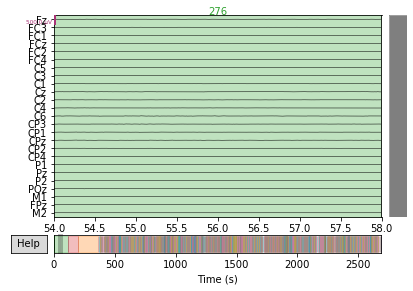

In [38]:
raw_corrected.plot(n_channels=25, start=54, duration=4,
                   scalings=dict(eeg=250e-6, eog=750e-6))